In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('input.txt', header = None)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X = X - X.mean(axis = 0)
X = X / X.std(axis = 0)
bias= np.ones((df.shape[0],1))
X = np.hstack((X,bias))

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [68]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def predict(X, w, threshold=0.5):
    h = sigmoid(np.dot(X,w))
#     print(h)
    return h>=threshold

# Without Regularization

In [69]:
def loss(y, h):
    return -(y * np.log(h) + (1 - y) * np.log(1 - h))

In [70]:
w = np.random.randn(X.shape[1])
iterations = 3000
alpha = 0.01
losses = []
for _ in range(iterations):
    z = np.dot(X_train,w)
    h = sigmoid(z)
    l = loss(y_train,h)
    epoch_loss= np.sum(l)/y_train.shape[0]
#     print(epoch_loss)
    losses.append(epoch_loss)
    gradient = np.dot(X_train.T, (h - y_train)) / y_train.size
    w -= alpha * gradient
print(w)

[-2.7863677  -1.24707857 -1.31188974  0.50124302 -0.44416803]


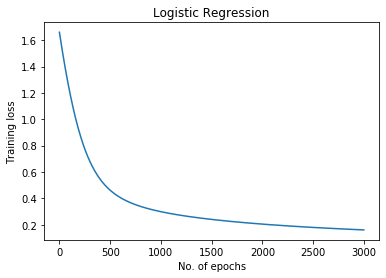

In [72]:
plt.plot(losses)
plt.title('Logistic Regression',loc='center')
plt.xlabel('No. of epochs')
plt.ylabel('Training loss')
plt.show()

In [73]:
# Prediction
y_test = np.array(y_test)
# print(y_test)
y_pred = predict(X_test, w)
fp,fn,tp,tn = [0,0,0,0]

for i in range(len(y_test)):
    if(y_test[i] == 1):
        if (y_pred[i] == 1):
            tp+=1
        else:
            fn+=1
    else:
        if(y_pred[i] == 0):
            tn+=1
        else:
            fp+=1

print(tp,fp,tn,fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_score = (2 * precision * recall) / (precision + recall)
accuracy= (tp+tn) / (tp+tn+fp+fn)
print('F-score: ', f_score)
print('Accuracy: ', accuracy)

117 11 142 5
F-score:  0.9359999999999999
Accuracy:  0.9418181818181818


# L1 - Regularization

In [77]:
w = np.random.randn(X.shape[1])
iterations = 4000
alpha = 0.01
lambd = 0.01
losses = []
for _ in range(iterations):
    z = np.dot(X_train,w)
    h = sigmoid(z)
    l = loss(y_train,h) + lambd/2 * np.sum(w)
    epoch_loss= np.sum(l)/y_train.shape[0]
#     print(epoch_loss)
    losses.append(epoch_loss)
    gradient = (np.dot(X_train.T, (h - y_train)) + lambd/2*np.sign(w)) / y_train.size 
    w -= alpha * gradient
print(w)

[-2.88205742 -2.226681   -1.9894256   0.17078168 -0.52462825]


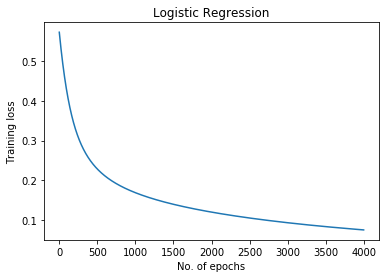

In [78]:
plt.plot(losses)
plt.title('Logistic Regression',loc='center')
plt.xlabel('No. of epochs')
plt.ylabel('Training loss')
plt.show()

In [79]:
# Prediction
y_test = np.array(y_test)
# print(y_test)
y_pred = predict(X_test, w)
fp,fn,tp,tn = [0,0,0,0]

for i in range(len(y_test)):
    if(y_test[i] == 1):
        if (y_pred[i] == 1):
            tp+=1
        else:
            fn+=1
    else:
        if(y_pred[i] == 0):
            tn+=1
        else:
            fp+=1

print(tp,fp,tn,fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_score = (2 * precision * recall) / (precision + recall)
accuracy= (tp+tn) / (tp+tn+fp+fn)
print('F-score: ', f_score)
print('Accuracy: ', accuracy)

121 9 144 1
F-score:  0.9603174603174605
Accuracy:  0.9636363636363636


# L2 - Regularization

In [83]:
w = np.random.randn(X.shape[1])
iterations = 4000
alpha = 0.01
lambd = 0.01
losses = []
for _ in range(iterations):
    z = np.dot(X_train,w)
    h = sigmoid(z)
    l = loss(y_train,h) + (lambd/2)*np.dot(w,w)
    epoch_loss= np.sum(l)/y_train.shape[0]
    print(epoch_loss)
    losses.append(epoch_loss)
    gradient = (np.dot(X_train.T, (h-y_train)) + lambd/2* w) / y_train.size
    w -= (alpha * gradient)
print(w)

1.0719560476144792
1.069237843275648
1.0665259269972975
1.0638203108931774
1.061121007016848
1.0584280273604696
1.0557413838535847
1.0530610883618987
1.0503871526860464
1.0477195885603632
1.0450584076516396
1.0424036215578785
1.0397552418070424
1.0371132798557956
1.0344777470882434
1.0318486548146621
1.0292260142702294
1.0266098366137435
1.0240001329263426
1.0213969142102168
1.0188001913873161
1.016209975298055
1.013626276700011
1.0110491062666211
1.008478474585872
1.0059143921589877
1.003356869399115
1.0008059166300018
0.998261544084675
0.9957237619041144
0.9931925801359232
0.9906680087329959
0.9881500575521834
0.9856387363529567
0.9831340547960653
0.9806360224421973
0.9781446487506346
0.9756599430779082
0.9731819146764494
0.9707105726932439
0.9682459261684797
0.9657879840341972
0.963336755112939
0.960892248116396
0.9584544716440557
0.9560234341818501
0.953599144100803
0.9511816096556776
0.9487708389836251
0.9463668401028339
0.9439696209111795
0.9415791891848763
0.9391955525771299
0.9

0.4463106890506668
0.4458605799166097
0.445412010542637
0.4449649724477898
0.4445194572063489
0.4440754564475002
0.44363296185499956
0.4431919651668398
0.4427524581749175
0.4423144327247016
0.44187788071490275
0.44144279409714343
0.441009164875629
0.4405769851068207
0.4401462468991082
0.4397169424124848
0.43928906385822286
0.43886260349854994
0.43843755364632764
0.4380139066647301
0.4375916549669241
0.43717079101575085
0.4367513073234086
0.4363331964511364
0.4359164510088991
0.43550106365507424
0.43508702709613933
0.4346743340863613
0.4342629774274862
0.4338529499684311
0.43344424460497744
0.43303685427946487
0.4326307719804868
0.43222599074258816
0.43182250364596314
0.43142030381615515
0.4310193844237582
0.4306197386841193
0.4302213598570427
0.4298242412464952
0.4294283762003131
0.4290337581099103
0.42864038040998836
0.4282482365782476
0.42785732013509964
0.4274676246433817
0.42707914370807215
0.42669187097600747
0.4263058001356009
0.42592092491656225
0.4255372390896198
0.425154736466

0.32863587330500577
0.3284753027527463
0.3283149910909679
0.3281549376317619
0.32799514169012944
0.3278356025839648
0.3276763196340394
0.32751729216398556
0.32735851950028005
0.32720000097222857
0.32704173591194974
0.326883723654359
0.32672596353715344
0.3265684549007959
0.3264111970884995
0.32625418944621276
0.32609743132260355
0.32594092206904446
0.3257846610395977
0.32562864759099996
0.32547288108264777
0.3253173608765826
0.325162086337476
0.32500705683261566
0.32485227173188996
0.3246977304077747
0.3245434322353179
0.324389376592126
0.32423556285835
0.32408199041667063
0.32392865865228554
0.32377556695289467
0.3236227147086867
0.32347010131232545
0.32331772615893656
0.32316558864609357
0.3230136881738048
0.32286202414450005
0.3227105959630175
0.32255940303659003
0.322408444774833
0.3222577205897308
0.3221072298956239
0.3219569721091964
0.32180694664946324
0.3216571529377572
0.3215075903977169
0.32135825845527416
0.32120915653864124
0.3210602840782991
0.320911640506985
0.32076322525

0.27054668378643326
0.2704656334825416
0.27038467869287053
0.2703038192721602
0.2702230550754721
0.2701423859581882
0.27006181177600996
0.26998133238495714
0.26990094764136713
0.2698206574018934
0.26974046152350517
0.26966035986348574
0.26958035227943195
0.269500438629253
0.26942061877116946
0.2693408925637123
0.2692612598657221
0.26918172053634765
0.26910227443504536
0.26902292142157824
0.26894366135601466
0.2688644940987277
0.26878541951039403
0.2687064374519931
0.2686275477848059
0.2685487503704144
0.26847004507070044
0.2683914317478445
0.26831291026432535
0.26823448048291865
0.2681561422666962
0.268077895479025
0.26799973998356647
0.2679216756442751
0.2678437023253982
0.2677658198914745
0.26768802820733334
0.26761032713809374
0.2675327165491638
0.26745519630623954
0.26737776627530385
0.26730042632262613
0.26722317631476095
0.2671460161185473
0.26706894560110794
0.26699196462984803
0.2669150730724548
0.26683827079689637
0.26676155767142107
0.2666849335645564
0.26660839834510835
0.26

0.2433538587384897
0.24330322215521086
0.24325263953519752
0.24320211081252036
0.24315163592135708
0.24310121479599114
0.2430508473708125
0.24300053358031684
0.24295027335910532
0.2429000666418846
0.2428499133634664
0.24279981345876755
0.2427497668628093
0.24269977351071773
0.24264983333772291
0.242599946279159
0.242550112270464
0.24250033124717946
0.24245060314495032
0.24240092789952467
0.24235130544675346
0.24230173572259045
0.2422522186630917
0.24220275420441578
0.24215334228282312
0.24210398283467602
0.2420546757964384
0.24200542110467557
0.24195621869605402
0.24190706850734126
0.24185797047540541
0.24180892453721534
0.24175993062983994
0.24171098869044863
0.24166209865631022
0.2416132604647937
0.2415644740533672
0.24151573935959822
0.24146705632115334
0.241418424875798
0.24136984496139624
0.24132131651591054
0.24127283947740155
0.24122441378402815
0.2411760393740467
0.24112771618581147
0.241079444157774
0.2410312232284829
0.24098305333658407
0.24093493442081998
0.2408868664200297


0.2236890203978693
0.22365882308747467
0.2236286566137036
0.22359852094448274
0.22356841604778088
0.2235383418916089
0.2235082984440195
0.22347828567310743
0.223448303547009
0.22341835203390245
0.22338843110200757
0.22335854071958572
0.22332868085493998
0.22329885147641465
0.2232690525523956
0.22323928405130988
0.22320954594162598
0.2231798381918534
0.22315016077054287
0.22312051364628618
0.22309089678771593
0.22306131016350597
0.2230317537423707
0.22300222749306545
0.22297273138438625
0.22294326538516981
0.2229138294642934
0.22288442359067484
0.22285504773327236
0.22282570186108466
0.22279638594315068
0.22276709994854973
0.2227378438464012
0.22270861760586463
0.22267942119613973
0.22265025458646612
0.22262111774612336
0.22259201064443096
0.22256293325074814
0.22253388553447392
0.2225048674650469
0.22247587901194554
0.2224469201446876
0.2224179908328304
0.2223890910459707
0.2223602207537447
0.22233137992582777
0.22230256853193453
0.2222737865418188
0.2222450339252736
0.2222163106521308

0.21343260027595964
0.21341291146981287
0.21339324309263458
0.21337359512525378
0.21335396754852182
0.21333436034331218
0.21331477349052072
0.2132952069710655
0.21327566076588664
0.21325613485594652
0.21323662922222958
0.21321714384574245
0.2131976787075136
0.21317823378859374
0.2131588090700555
0.2131394045329934
0.21312002015852397
0.2131006559277856
0.21308131182193848
0.21306198782216487
0.21304268390966857
0.21302340006567527
0.2130041362714324
0.2129848925082091
0.21296566875729617
0.21294646500000614
0.212927281217673
0.21290811739165247
0.21288897350332184
0.21286984953407984
0.2128507454653467
0.21283166127856423
0.21281259695519553
0.21279355247672524
0.21277452782465928
0.21275552298052502
0.21273653792587102
0.2127175726422672
0.2126986271113048
0.21267970131459618
0.21266079523377487
0.21264190885049578
0.21262304214643468
0.2126041951032887
0.21258536770277583
0.21256655992663528
0.21254777175662717
0.21252900317453272
0.21251025416215402
0.2124915247013141
0.212472814773

0.20592872209713278
0.20591709053968052
0.20590547220201935
0.20589386707293314
0.20588227514121724
0.2058706963956788
0.2058591308251364
0.20584757841842036
0.20583603916437254
0.20582451305184635
0.20581300006970676
0.20580150020683027
0.20579001345210496
0.20577853979443037
0.20576707922271756
0.205755631725889
0.20574419729287882
0.2057327759126324
0.20572136757410664
0.2057099722662699
0.20569858997810192
0.20568722069859377
0.20567586441674804
0.20566452112157857
0.2056531908021106
0.20564187344738077
0.20563056904643698
0.20561927758833837
0.20560799906215554
0.20559673345697024
0.20558548076187558
0.20557424096597587
0.2055630140583867
0.20555180002823484
0.20554059886465834
0.2055294105568064
0.20551823509383937
0.2055070724649289
0.2054959226592577
0.20548478566601963
0.2054736614744197
0.205462550073674
0.2054514514530098
0.2054403656016654
0.2054292925088902
0.20541823216394464
0.20540718455610021
0.20539614967463948
0.20538512750885593
0.20537411804805422
0.205363121281549

0.2015131772424412
0.2015070262699629
0.20150088405910066
0.20149475060305203
0.2014886258950208
0.2014825099282171
0.20147640269585748
0.20147030419116485
0.20146421440736847
0.20145813333770393
0.2014520609754131
0.2014459973137443
0.20143994234595206
0.2014338960652972
0.20142785846504704
0.20142182953847496
0.20141580927886077
0.20140979767949052
0.2014037947336565
0.20139780043465733
0.20139181477579793
0.20138583775038937
0.20137986935174904
0.20137390957320053
0.20136795840807376
0.20136201584970467
0.20135608189143567
0.20135015652661517
0.201344239748598
0.20133833155074501
0.2013324319264233
0.20132654086900617
0.2013206583718731
0.20131478442840972
0.20130891903200787
0.20130306217606547
0.20129721385398666
0.20129137405918174
0.20128554278506708
0.2012797200250652
0.20127390577260473
0.20126810002112053
0.20126230276405338
0.20125651399485034
0.20125073370696447
0.20124496189385496
0.201239198548987
0.201233443665832
0.2012276972378673
0.2012219592585764
0.20121622972144879

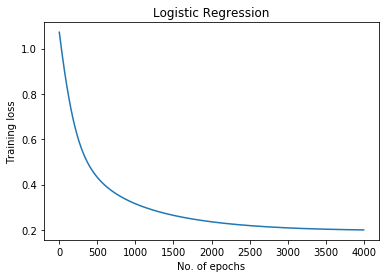

In [84]:
plt.plot(losses)
plt.title('Logistic Regression',loc='center')
plt.xlabel('No. of epochs')
plt.ylabel('Training loss')
plt.show()

In [86]:
# Prediction
y_test = np.array(y_test)
# print(y_test)
y_pred = predict(X_test, w)
fp,fn,tp,tn = [0,0,0,0]

for i in range(len(y_test)):
    if(y_test[i] == 1):
        if (y_pred[i] == 1):
            tp+=1
        else:
            fn+=1
    else:
        if(y_pred[i] == 0):
            tn+=1
        else:
            fp+=1

print(tp,fp,tn,fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_score = (2 * precision * recall) / (precision + recall)
accuracy= (tp+tn) / (tp+tn+fp+fn)
print('F-score: ', f_score)
print('Accuracy: ', accuracy)

120 9 144 2
F-score:  0.9561752988047808
Accuracy:  0.96
